# OpenCVのアフィン変換
バージョン4に対応した内容です。


## バージョンの確認とライブラリの読み込み

In [0]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

## 画像の準備

* Googleドライブをマウントしておいてください。
コピー元のパスは自分の環境に合わせてください。

In [0]:
cp  /content/drive/'My Drive'/images/mika.jpg ./


## アフィン変換とは

アフィン変換は線形変換（拡大、縮小、回転など）と平行移動を組み合わせた変換のことをいいます。

アフィン変換は次のような行列で表すことができます。
$$
\left(
    \begin{array}{ccc}
      x'   \\
      y'  \\
    \end{array}
  \right) = \left(
    \begin{array}{ccc}
      a & b  \\
      c & d  \\
    \end{array}
  \right)
  \left(
    \begin{array}{ccc}
      x   \\
      y  \\
    \end{array}
  \right)＋
  \left(
    \begin{array}{ccc}
      t_x   \\
      t_y  \\
    \end{array}
  \right)
$$


線形変換をまとめた行列、同時変換といいます。
$$
\left(
    \begin{array}{ccc}
      x'   \\
      y'  \\
       1  \\
    \end{array}
  \right) = \left(
    \begin{array}{ccc}
      a & b & t_x \\
      c & d & t_y \\
      0 & 0 & 1 \\
    \end{array}
  \right)
  \left(
    \begin{array}{ccc}
      x   \\
      y  \\
      1  \\
    \end{array}
  \right)
$$


### アフィン変換の拡大縮小

x軸方向にa倍、y軸方向にd倍するには次のようにします。
$$
\left(
    \begin{array}{ccc}
      x'   \\
      y'  \\
       1  \\
    \end{array}
  \right) = \left(
    \begin{array}{ccc}
      a & 0 & 0 \\
      0 & d & 0 \\
      0 & 0 & 1 \\
    \end{array}
  \right)
  \left(
    \begin{array}{ccc}
      x   \\
      y  \\
      1  \\
    \end{array}
  \right)
$$

### アフィン変換の平行移動

a,b,c,d部分を単位行列にします。
$$
\left(
    \begin{array}{ccc}
      x'   \\
      y'  \\
       1  \\
    \end{array}
  \right) = \left(
    \begin{array}{ccc}
      1 & 0 & t_x \\
      0 & 1 & t_y \\
      0 & 0 & 1 \\
    \end{array}
  \right)
  \left(
    \begin{array}{ccc}
      x   \\
      y  \\
      1  \\
    \end{array}
  \right)
$$

###  アフィン変換の回転

原点周りにθ回転させます。
$$
\left(
    \begin{array}{ccc}
      x'   \\
      y'  \\
       1  \\
    \end{array}
  \right) = \left(
    \begin{array}{ccc}
      cosθ & -sinθ & 0 \\
      sinθ & cosθ & 0\\
      0 & 0 & 1 \\
    \end{array}
  \right)
  \left(
    \begin{array}{ccc}
      x   \\
      y  \\
      1  \\
    \end{array}
  \right)
$$

### アフィン変換のスキュー

四角形を平行四辺形に変形します。
$$
\left(
    \begin{array}{ccc}
      x'   \\
      y'  \\
       1  \\
    \end{array}
  \right) = \left(
    \begin{array}{ccc}
      1 & 0 & 0 \\
      tanθ & 1 & 0 \\
      0 & 0 & 1 \\
    \end{array}
  \right)
  \left(
    \begin{array}{ccc}
      x   \\
      y  \\
      1  \\
    \end{array}
  \right)
$$





In [0]:
A = np.eye(2,2)
X = np.array([[1], [2]])
T = np.array([[3], [4]])
Y = np.dot(A,X) + T
print('A:', A, sep='\n')
print('----------------------')
print('X:', X, sep='\n')
print('----------------------')
print('T:', T, sep='\n')
print('----------------------')
print('Y:', Y, sep='\n')

A:
[[1. 0.]
 [0. 1.]]
----------------------
X:
[[1]
 [2]]
----------------------
T:
[[3]
 [4]]
----------------------
Y:
[[4.]
 [6.]]


In [0]:
AA = np.concatenate([A, T],axis=1)
B = np.array([0, 0, 1]).reshape(1,3)
BB = np.concatenate([AA, B], axis=0)
XX = np.array([[1], [2], [1]]) 
YY = np.dot(BB,XX)
print('AA:', AA, sep='\n')
print('----------------------')
print('BB:', BB, sep='\n')
print('----------------------')
print('XX:', XX, sep='\n')
print('----------------------')
print('YY:', YY, sep='\n')

AA:
[[1. 0. 3.]
 [0. 1. 4.]]
----------------------
BB:
[[1. 0. 3.]
 [0. 1. 4.]
 [0. 0. 1.]]
----------------------
XX:
[[1]
 [2]
 [1]]
----------------------
YY:
[[4.]
 [6.]
 [1.]]


### 通常表示

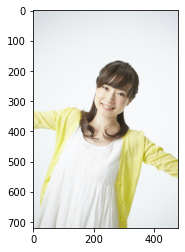

In [0]:
mika_bgr = cv2.imread('mika.jpg')
mika_rgb = cv2.cvtColor(mika_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(mika_rgb);
plt.show()


## OpenCVでアフィン変換を行う際に必要な関数

* af = cv2.getAffineTransform(src, dest)
* converted = cv2.warpAffine(image, af, (size_x, size_y))
* affine = cv2.getRotationMatrix2D((w/2.0, h/2.0), angle, 1.0)

### アフィン変換の変換行列を求める
* 左上を原点にする三角形の座標を作成したものをsrcとする。
* 水平移動した座標をdestとするNumpy配列を作成する。
* cv2.getAffineTransform(src, dest)で変換行列を作成します。

![代替テキスト](https://itstudio.co/sample/images/affine1.png)
![代替テキスト](https://itstudio.co/sample/images/affine4.png)

720 480
[[  1.   0. 100.]
 [  0.   1.   0.]]


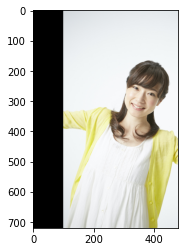

In [0]:
# 右方向へ移動
mika_bgr = cv2.imread('mika.jpg')
mika_rgb = cv2.cvtColor(mika_bgr, cv2.COLOR_BGR2RGB)
h, w = tuple(mika_rgb.shape[:2])
print(h,w)
src = np.array([[0.0, 0.0],[0.0, 1.0],[1.0, 0.0]], np.float32)
dest = src.copy()
dest[:,0] += 100 # シフトするピクセル値
affine = cv2.getAffineTransform(src, dest)
print(affine)
result_img = cv2.warpAffine(mika_rgb, affine, (w, h))
plt.imshow(result_img);
plt.show()

### 水平移動
`src = np.array([[0.0, 0.0],[0.0, 1.0],[1.0, 0.0]], np.float32)`ではfloat32型にしておかないと、`cv2.getAffineTransform`でエラーがでます。

上のコードと同じことをgetAffineTransformを使わないで記述できます。

線形変換をまとめた行列を直接作成します。
abcd部分は単位行列にするだけです。

$$
\left(
    \begin{array}{ccc}
      x'   \\
      y'  \\
       1  \\
    \end{array}
  \right) = \left(
    \begin{array}{ccc}
      a & b & t_x \\
      c & d & t_y \\
      0 & 0 & 1 \\
    \end{array}
  \right)
  \left(
    \begin{array}{ccc}
      x   \\
      y  \\
      1  \\
    \end{array}
  \right)
$$


720 480
[[  1.   0. 100.]
 [  0.   1.   0.]]


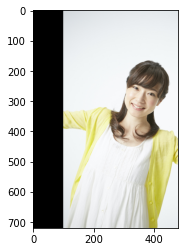

In [0]:
# 右方向へ移動
mika_bgr = cv2.imread('mika.jpg')
mika_rgb = cv2.cvtColor(mika_bgr, cv2.COLOR_BGR2RGB)
h, w = tuple(mika_rgb.shape[:2])
print(h,w)
affine = np.array([[1,0,100],[0,1,0]],dtype='float32')
print(affine)
result_img = cv2.warpAffine(mika_rgb, affine, (w, h))
plt.imshow(result_img);
plt.show()

### 拡大縮小
$$
\left(
    \begin{array}{ccc}
      x'   \\
      y'  \\
       1  \\
    \end{array}
  \right) = \left(
    \begin{array}{ccc}
      a & 0 & 0 \\
      0 & d & 0 \\
      0 & 0 & 1 \\
    \end{array}
  \right)
  \left(
    \begin{array}{ccc}
      x   \\
      y  \\
      1  \\
    \end{array}
  \right)
$$
![代替テキスト](https://itstudio.co/sample/images/affine1.png)
![代替テキスト](https://itstudio.co/sample/images/affine2.png)

720 480
[[2. 0. 0.]
 [0. 2. 0.]]


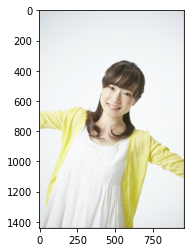

In [0]:
# 拡大
mika_bgr = cv2.imread('mika.jpg')
mika_rgb = cv2.cvtColor(mika_bgr, cv2.COLOR_BGR2RGB)
h, w = tuple(mika_rgb.shape[:2])
print(h,w)
src = np.array([[0.0, 0.0],[0.0, 1.0],[1.0, 0.0]], np.float32)
dest = src * 2
affine = cv2.getAffineTransform(src, dest)
print(affine)
result_img = cv2.warpAffine(mika_rgb, affine, (2*w, 2*h), cv2.INTER_LANCZOS4)
plt.imshow(result_img);
plt.show()

720 480


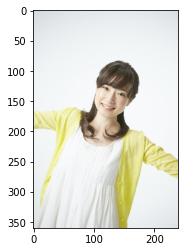

In [0]:
# 縮小
mika_bgr = cv2.imread('mika.jpg')
mika_rgb = cv2.cvtColor(mika_bgr, cv2.COLOR_BGR2RGB)
h, w = tuple(mika_rgb.shape[:2])
print(h,w)
src = np.array([[0.0, 0.0],[0.0, 1.0],[1.0, 0.0]], np.float32)
dest = src * 0.5
affine = cv2.getAffineTransform(src, dest)
result_img = cv2.warpAffine(mika_rgb, affine, (w//2, h//2), cv2.INTER_LANCZOS4)
plt.imshow(result_img);
plt.show()

### 画像の回転

#### アフィン変換変換行列
cv2.getRotationMatrix2D(Point center,double angle,double scale)
* Point center : 回転の中心座標
* double angle : 回転角度（度）＋は左回り
* double scale : 拡大倍率


cv2.warpAffine(src, M, dsize[, dst[, flags[, borderMode[, borderValue]]]])
* src :（NumPy配列ndarray）
* M : 2 x 3の変換行列（NumPy配列ndarray）
* dsize : 出力画像のサイズ（タプル）

[[  0.70710678   0.70710678 -64.26406871]
 [ -0.70710678   0.70710678 324.85281374]]


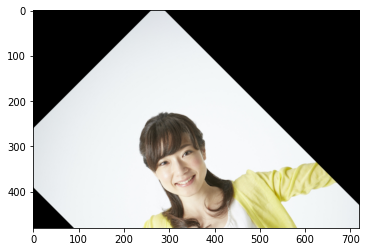

In [0]:
mika_bgr = cv2.imread('mika.jpg')
mika_rgb = cv2.cvtColor(mika_bgr, cv2.COLOR_BGR2RGB)

mat=cv2.getRotationMatrix2D(tuple(np.array(mika_rgb.shape[:2])/2),45,1.0)
print(mat)
result_img=cv2.warpAffine(mika_rgb,mat,mika_rgb.shape[:2])

plt.imshow(result_img);
plt.show()

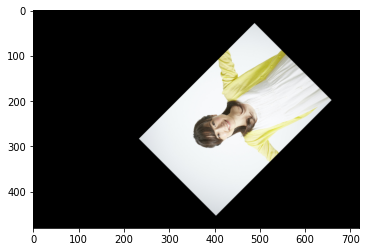

In [0]:
mika_bgr = cv2.imread('mika.jpg')
mika_rgb = cv2.cvtColor(mika_bgr, cv2.COLOR_BGR2RGB)

mat=cv2.getRotationMatrix2D(tuple(np.array(mika_rgb.shape[:2])/2),135,0.5)

result_img=cv2.warpAffine(mika_rgb,mat,mika_rgb.shape[:2])

plt.imshow(result_img);
plt.show()

$$
\begin{pmatrix} x' \\ y' \end{pmatrix}=
{\begin{bmatrix}
\cos\theta & -\sin\theta \\
\sin\theta & \cos\theta
\end{bmatrix}\begin{pmatrix} x \\ y \end{pmatrix}
}
$$

![代替テキスト](https://itstudio.co/sample/images/affine3.png)

サイズ： (720, 480, 3)
[[ 0.70710677  0.70710677  0.        ]
 [-0.70710677  0.70710677  0.        ]]


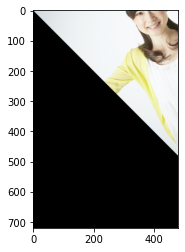

In [0]:
mika_bgr = cv2.imread('mika.jpg')
mika_rgb = cv2.cvtColor(mika_bgr, cv2.COLOR_BGR2RGB)
size = mika_rgb.shape
print('サイズ：', size)
h, w = tuple(mika_rgb.shape[:2])
src = np.array([[0.0, 0.0],[0.0, 1.0],[1.0, 0.0]], np.float32)
# 三角関数を使った書き方（π/3=45度回転させる場合）
dest = np.array([[0.0, 0.0], [np.sin(np.deg2rad(45)),np.cos(np.deg2rad(45))], [np.cos(np.deg2rad(45)),-np.sin(np.deg2rad(45))]], np.float32)
affine = cv2.getAffineTransform(src, dest)
print(affine)
result_img=cv2.warpAffine(mika_rgb, affine, (w,h))

plt.imshow(result_img);
plt.show()

[[ 0.70710678  0.70710678  0.        ]
 [-0.70710678  0.70710678  0.        ]]


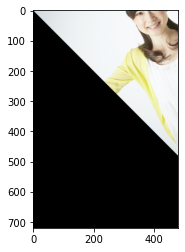

In [0]:
mika_bgr = cv2.imread('mika.jpg')
mika_rgb = cv2.cvtColor(mika_bgr, cv2.COLOR_BGR2RGB)
h, w = tuple(mika_rgb.shape[:2])
mat=cv2.getRotationMatrix2D((0,0),45,1.0)
print(mat)
result_img=cv2.warpAffine(mika_rgb,mat, (w,h))

plt.imshow(result_img);
plt.show()